In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Omar Hamzic\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [92]:
#import csv file to conduct churn prediction using decision trees
df = pd.read_csv("C:/Users/Omar Hamzic/Documents/Project_3_Customer_Churn_Model/Data (1)/Data/data_regression.csv")

In [93]:
df.head()
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [94]:
#We need to create a function to prepare the model
def prepare_model_smote(df, class_col, cols_to_exclude):
    # Select numeric columns as features
    cols = df.select_dtypes(include = np.number).columns.tolist()
    # Exclude the target column and any columns specified in cols_to_exclude
    cols_to_drop = [col for col in cols if col in [class_col] + cols_to_exclude]
    X = df[cols].drop(cols_to_drop, axis=1)
    y = df[class_col]
    y = df[class_col]
    # Split the data into training and testing sets, with 30% of the data reserved for testing
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    # Use SMOTE to oversample the minority class to balance the data
    sm = SMOTE(random_state=0, sampling_strategy=1.0)
    X_train, y_train = sm.fit_resample(X_train, y_train)

def run_logreg_model(X_train, X_test, y_train, y_test):
    # Train a logistic regression model on the balanced training data
    global logreg 
    logreg = LogisticRegression(random_state=13)
    logreg.fit(X_train, y_train)
    # Use the trained model to predict the target variable on the test data
    global y_pred
    y_pred = logreg.predict(X_test)
    # Calculate the area under the ROC curve to evaluate model performance
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    # Print a classification report and the ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f" % logit_roc_auc)

def run_dectree_model(X_train, X_test, y_train, y_test):
    # Train a logistic regression model on the balanced training data
    global dectree 
    dectree = DecisionTreeClassifier(random_state=13, criterion = 'gini')
    dectree.fit(X_train, y_train)
    # Use the trained model to predict the target variable on the test data
    global y_pred
    y_pred = dectree.predict(X_test)
    # Calculate the area under the ROC curve to evaluate model performance
    dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
    # Print a classification report and the ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f" % dectree_roc_auc)



In [95]:
df = df.dropna()
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


### **Logistic Regression Model**

In [96]:
prepare_model_smote(df, class_col = 'churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

In [130]:
run_logreg_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76       513
         1.0       0.18      0.65      0.28        63

    accuracy                           0.64       576
   macro avg       0.56      0.65      0.52       576
weighted avg       0.85      0.64      0.71       576

The area under the curve is: 0.65


### **Decision Tree Model**

In [98]:
prepare_model_smote(df, class_col = 'churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

In [99]:
run_dectree_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90       513
         1.0       0.30      0.48      0.37        63

    accuracy                           0.82       576
   macro avg       0.62      0.67      0.63       576
weighted avg       0.86      0.82      0.84       576

The area under the curve is: 0.67


In [100]:
def roc_curve (model, X_test,y_test):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.plot([0,1], [0,1], 'b--')

    plt.plot(fpr, tpr, color = 'darkorange', label = 'Model (area = %0.2f)' % logit_roc_auc)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Posivitive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.savefig('Log_ROC')
    plt.show()

In [108]:
def plot_roc_curve(model, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    """
    Plot the ROC curve for a binary classification model.

    Parameters:
    - model: a trained binary classification model
    - X_test: the feature matrix for the test set
    - y_test: the target vector for the test set
    - filename: (optional) the filename to save the figure as (in PNG format)

    Returns:
    - None
    """
    # Calculate the ROC AUC score and curve
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Plot the ROC curve
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], 'b--')
    plt.plot(fpr, tpr, color='darkorange', label=f'Model (area = {logit_roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.savefig('Log_ROC')

    plt.show()

In [111]:
def confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

    tn, fp, fn, tp = confusion_matrix.ravel()
    print('True Negative: %0.2f'%tn)
    print('True Positive: %0.2f'%tp)
    print('False Positive: %0.2f'%fp)
    print('False Negative: %0.2f'%fn)

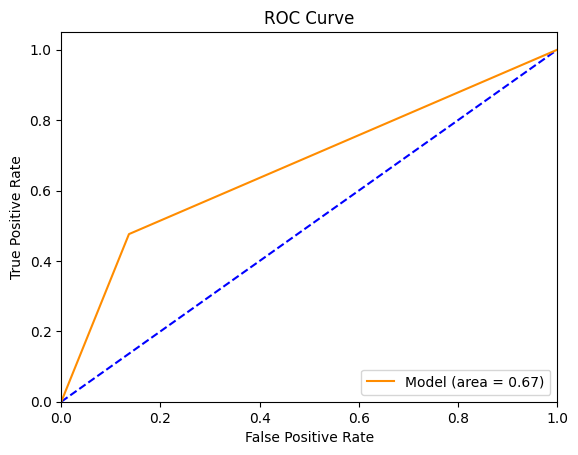

In [110]:
plot_roc_curve(dectree, X_test, y_test)

In [112]:
confusion_matrix(y_test, y_pred)

[[443  70]
 [ 33  30]]
True Negative: 443.00
True Positive: 30.00
False Positive: 70.00
False Negative: 33.00


In [113]:
def plot_model( model, class_names, max_depth = None, figsize = (20,20), fontsize =1):
    plt.figure(figsize = figsize)
    tree.plot_tree(dectree
                    ,feature_names = dectree.feature_names_in_
                    ,fontsize=fontsize
                    ,max_depth = max_depth
                    ,class_names = class_names
                    ,filled = True);
    

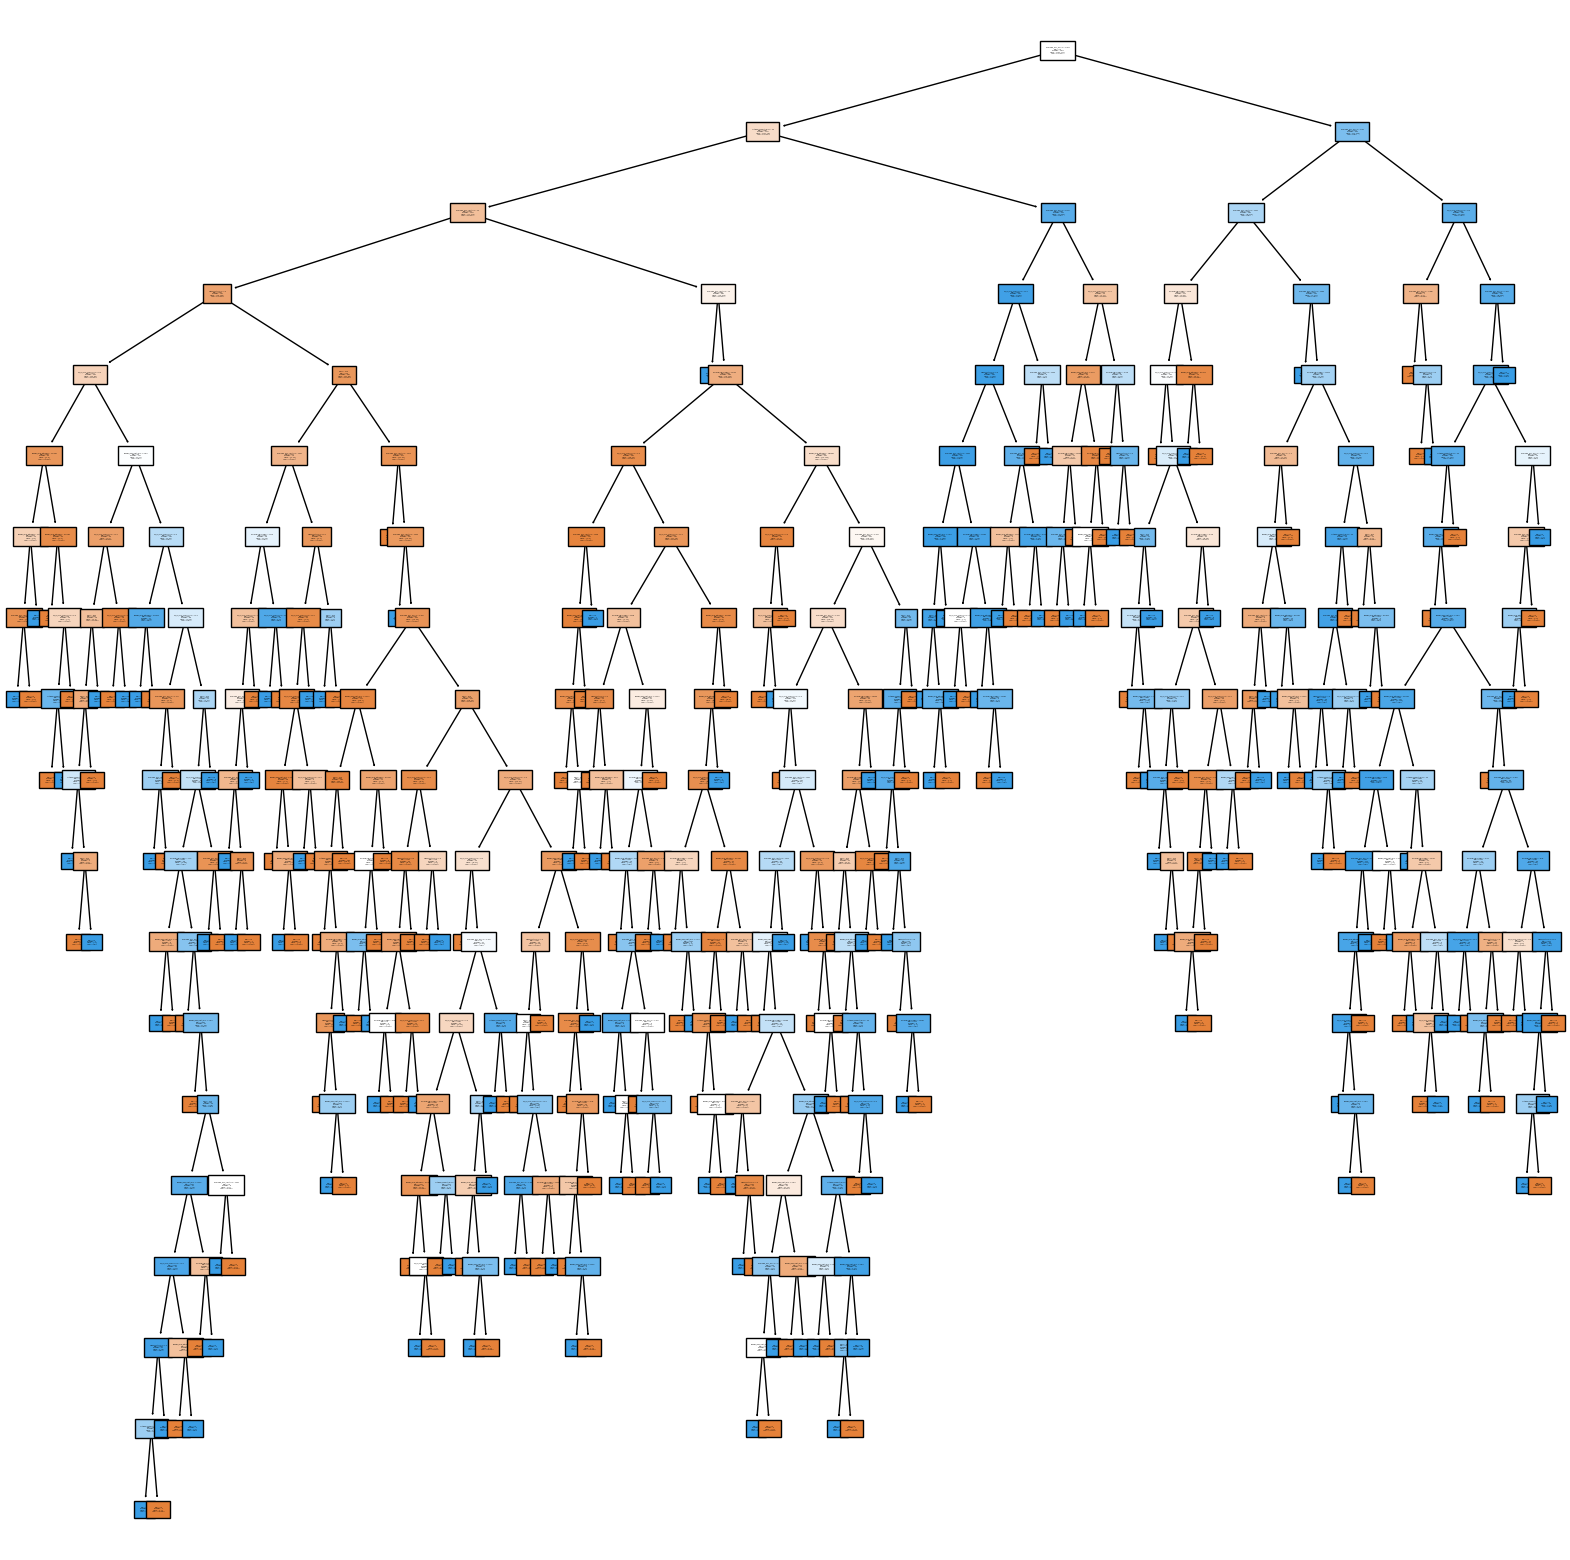

In [115]:
plot_model(dectree,['not churn', 'churn'])

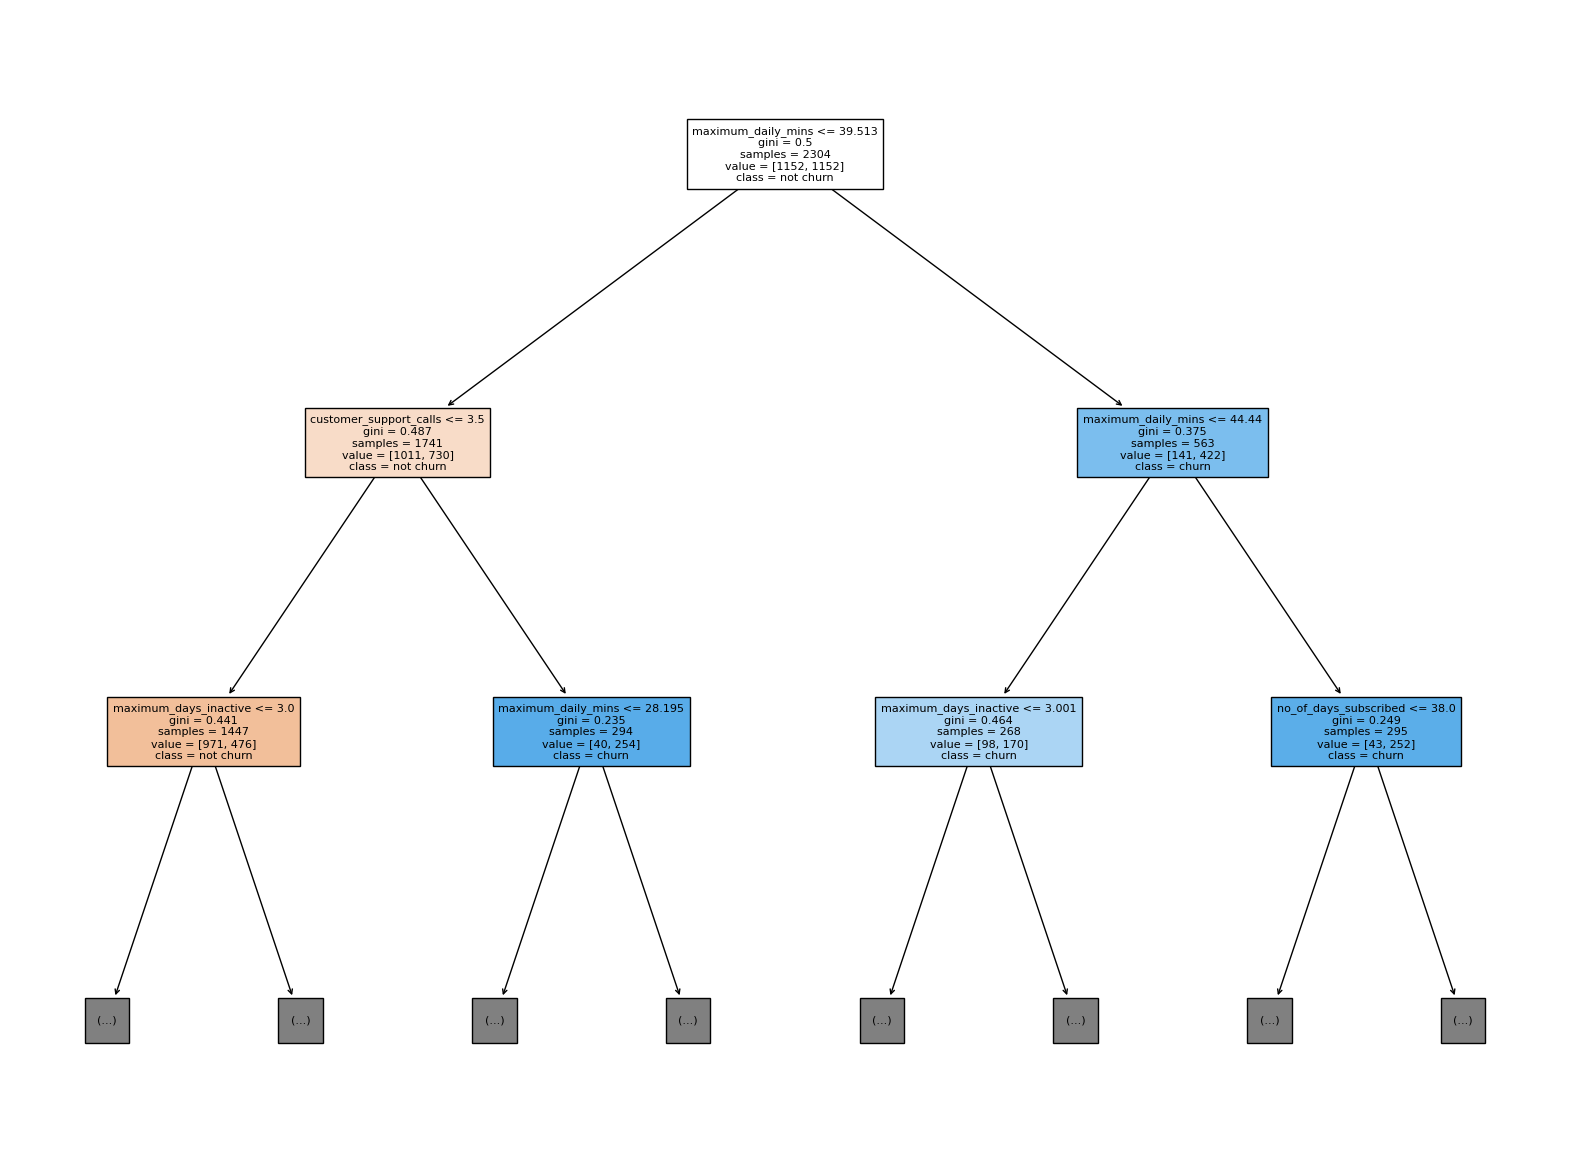

In [118]:
plot_model(dectree,['not churn', 'churn'], max_depth = 2, figsize = (20,15), fontsize=8)

In [123]:
def read_tree(model):
    # Get the tree structure from the model
    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    feature_names = model.feature_names_in_
    threshold = model.tree_.threshold

    # Initialize arrays to store node depth and whether each node is a leaf
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)

    # Traverse the tree and update node depth and leaf status arrays
    stack = [(0, 0)]
    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        is_split_node = children_left[node_id] != children_right[node_id]

        if is_split_node:
            # If the node is a split node, add its children to the stack
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            # If the node is a leaf node, mark it as such
            is_leaves[node_id] = True

    # Print the tree structure
    print("The binary tree structure has {n} nodes and has the following tree structure:\n".format(n=n_nodes))

    for i in range(n_nodes):
        if is_leaves[i]:
            # If the node is a leaf node, print its ID and mark it as such
            print("{space}node = {node} is a leaf node.".format(space=node_depth[i] * "\t", node=i))
        else:
            # If the node is a split node, print its ID, split condition, and child nodes
            print("{space}node = {node} is a split node: go to node {left} if {feature} <= {threshold}, else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature_names[feature[i]],
                threshold=round(threshold[i], 0),
                right=children_right[i]
            ))



In [124]:
read_tree(dectree)

The binary tree structure has 509 nodes and has the following tree structure:

node = 0 is a split node: go to node 1 if maximum_daily_mins <= 40.0, else to node 370.
	node = 1 is a split node: go to node 2 if customer_support_calls <= 4.0, else to node 323.
		node = 2 is a split node: go to node 3 if maximum_days_inactive <= 3.0, else to node 188.
			node = 3 is a split node: go to node 4 if videos_watched <= 2.0, else to node 73.
				node = 4 is a split node: go to node 5 if no_of_days_subscribed <= 88.0, else to node 18.
					node = 5 is a split node: go to node 6 if weekly_mins_watched <= 197.0, else to node 11.
						node = 6 is a split node: go to node 7 if weekly_mins_watched <= 192.0, else to node 10.
							node = 7 is a split node: go to node 8 if maximum_days_inactive <= 3.0, else to node 9.
								node = 8 is a leaf node.
								node = 9 is a leaf node.
							node = 10 is a leaf node.
						node = 11 is a split node: go to node 12 if weekly_mins_watched <= 341.0, else to

In [128]:
def plot_feature_importances(model):
    """
    Plot the feature importances for a decision tree model.

    Parameters:
    - model: a trained decision tree model

    Returns:
    - None
    """
    # Get the feature importances from the model and sort them in descending order
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)

    # Create a bar plot of the feature importances
    fig, ax = plt.subplots(figsize=(8, 6))
    feature_importances.plot.bar()
    ax.set_title("Feature Importances")
    ax.set_xlabel("Features")
    ax.set_ylabel("Importance")

    plt.show()




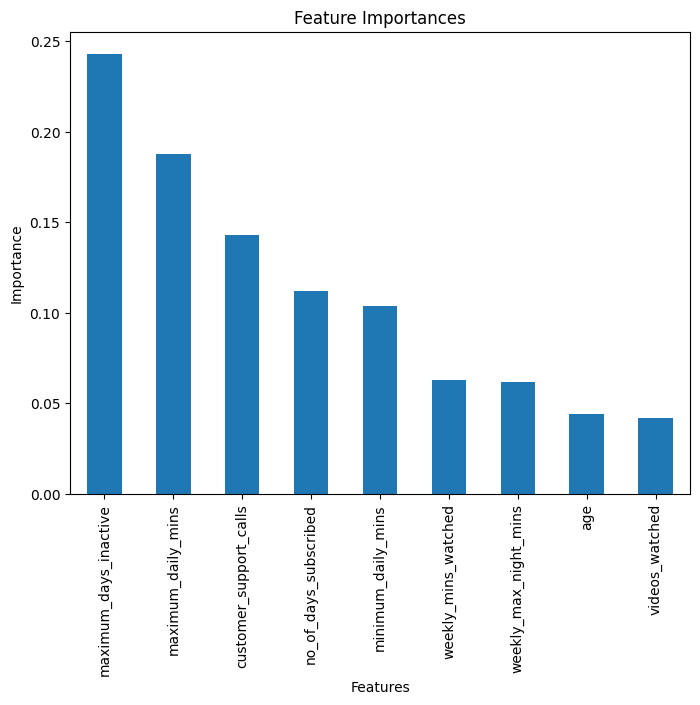

In [129]:
plot_feature_importances(dectree)